## Tidy Tuesday
#### 2020-06-17
#### American Slavery and Juneteenth

A brief description of the data set.

>The last dataset, african_names.csv records a history of freed slaves. These slaves were mostly freed during ship transport, had their names and ages recorded and were returned to free ports. Please note that while the data is accurate as historical records can be, often the rescuers and the Africans did not speak the same language, so names and ages are approximate.

More information and history on the data can be found [here](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-06-16).

Please note that this is a follow-along to Julia Silge's tutorial on [youtube](https://www.youtube.com/watch?v=z4oQh_5YMVk&t=142s). Her tutorials are in R, I'm trying to translate them to python to better develop my knowledge of the language.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-06-16/african_names.csv')

Let's start by just looking at the data. Note that under Dtype, columns listed as objects are essentially categorical variables.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91490 entries, 0 to 91489
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              91490 non-null  int64  
 1   voyage_id       91490 non-null  int64  
 2   name            91490 non-null  object 
 3   gender          78612 non-null  object 
 4   age             90364 non-null  float64
 5   height          86670 non-null  float64
 6   ship_name       91489 non-null  object 
 7   year_arrival    91490 non-null  int64  
 8   port_disembark  91490 non-null  object 
 9   port_embark     90364 non-null  object 
 10  country_origin  12086 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 7.7+ MB


Notice how in the Non-Null column not all the values are equal to the row total of 91,490? That means that we're missing data. Let's take a closer look.

In [3]:
df.isnull().sum()

id                    0
voyage_id             0
name                  0
gender            12878
age                1126
height             4820
ship_name             1
year_arrival          0
port_disembark        0
port_embark        1126
country_origin    79404
dtype: int64

We also look at the percent of data that we're missing for each column

In [4]:
df.isnull().sum().sort_values(ascending = False)/len(df.index)

country_origin    0.867898
gender            0.140759
height            0.052683
port_embark       0.012307
age               0.012307
ship_name         0.000011
port_disembark    0.000000
year_arrival      0.000000
name              0.000000
voyage_id         0.000000
id                0.000000
dtype: float64

We'll keep in mind that we have missing data moving forward but for now let's look at the total number of people who came to each port.

In [5]:
df['port_disembark'].value_counts()

Freetown               81009
Havana                 10058
Bahamas unspecified      183
Kingston, Jamaica        144
St. Helena                96
Name: port_disembark, dtype: int64

We can also look and see where each ship embarked from. Just note there are a lot of ports so we'll limit our output to just the first ten.

In [6]:
df['port_embark'].value_counts().head(10)

Lagos                         15730
Bonny                         14449
Ouidah                         8306
Old Calabar                    7192
Gallinhas                      4522
Bight of Benin unspecified     3958
Rio Pongo                      2922
Badagry                        2729
Cameroons River                2165
Sierra Leone unspecified       2091
Name: port_embark, dtype: int64

We can also take a look at the years this data set encompasses.

In [7]:
df['year_arrival'].describe()

count    91490.000000
mean      1831.402383
std          9.524704
min       1808.000000
25%       1826.000000
50%       1832.000000
75%       1837.000000
max       1862.000000
Name: year_arrival, dtype: float64

From this we can see we're looking a people who were freed between 1808 and 1862. Let's plot this to get a better visual

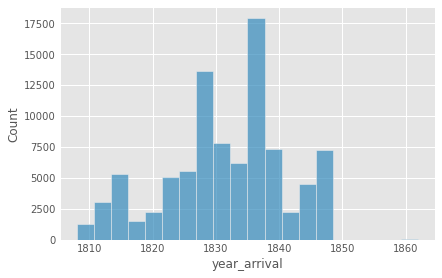

In [8]:
sns.histplot(df['year_arrival'],
            bins=20,
            alpha=0.7);

Now let's take a look at the people who were freed before 1850, we'll group by arrival year and find the mean age.

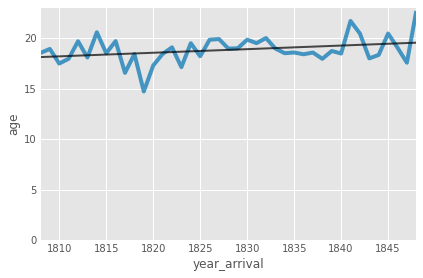

In [32]:
df_1850 = (
    df.loc[df['year_arrival'] < 1850, ['age', 'year_arrival']]
    .copy()
    .dropna()
    .groupby('year_arrival')
    .mean()
)

sns.lineplot(
    x='year_arrival',
    y='age',
    data=df_1850,
    color=[0,114/255,178/255],
    alpha=0.7
)

sns.regplot(x=df_1850.index,
            y='age',
            data=df_1850,
            scatter=False,
            ci=False,
            line_kws={'lw':2, 'alpha':0.7, 'color':'black'})

plt.ylim(0, None);

It's truly shocking to see just how young these people were.

Note that the code below will plot the same graph, but I prefer the ever so subtle layout that seaborn provides.
```python
df_1850.plot()
plt.ylim(0, None);
```

Now let's take a look at some boxplots comparing gender.

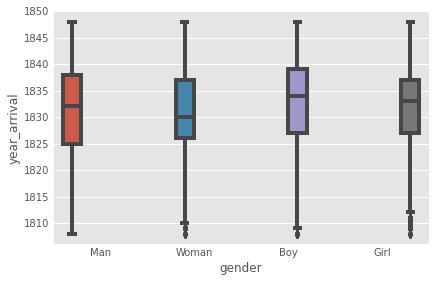

In [31]:
ax = sns.boxplot(
    x='gender',
    y='year_arrival',
    hue='gender',
    data=df
)
ax.legend_.remove();

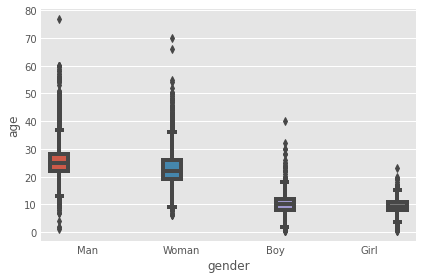

In [30]:
ax = sns.boxplot(
    x='gender',
    y='age',
    hue='gender',
    data=df
)
ax.legend_.remove();